In [1]:
import pandas as pd

from taxumap.taxumap_base import Taxumap

# Outline

This notebook demonstrates how to 1) load your data into TaxUMAP, 2) run the TaxUMAP, and 3) save your TaxUMAP embedding and a quick scatterplot.

## 1. Load data into TaxUMAP

Your TaxUMAP, here a variable called `tu`, can be created from data saved to your hard drive, or from a Pandas DataFrame read into this Jupyter notebook.

### From file

* Make sure to follow data formatting practices detailed in the **readme** file.

In [2]:
tu = Taxumap(taxonomy='example_data/taxonomy.csv', microbiota_data='example_data/microbiota_table.csv')
tu

Taxumap(agg_levels = ['Phylum', 'Family'], weights = [1, 1])

### From local scope

* Your microbiome (`rel_abundances`) and taxonomy (`taxonomy`) DataFrames must be formatted as described below.

In [3]:
# Load your microbiome dataframe from file
rel_abundances = pd.read_csv('example_data/microbiota_table.csv')

# Make sure you properly format your index
rel_abundances['index_column'] = rel_abundances['index_column'].astype(int)

# Set your dataframe's index
rel_abundances = rel_abundances.set_index('index_column')


rel_abundances

,Uniq1,Uniq10,Uniq100,Uniq10005,Uniq100070,Uniq100161,Uniq1003,Uniq100332,Uniq100353,Uniq100360,...,Uniq99523,Uniq99645,Uniq99650,Uniq99669,Uniq99681,Uniq99709,Uniq99780,Uniq99833,Uniq99884,Uniq99979
index_column,,,,,,,,,,,,,,,,,,,,,
66600164,0.670946,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
66600169,0.612890,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
66600209,0.001633,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
66600224,0.006367,0.000000,0.000462,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000024
66600226,0.917854,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66704977,0.000000,0.809957,0.000027,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.000106,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
66704978,0.000000,0.929111,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.000027,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
66704990,0.000000,0.000000,0.000094,0.000000,0.0,0.0,0.003682,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000157


In [4]:
# Load your taxonomy dataframe from file, and set the index to ASV/OTU (in this case, OTU)
tax = pd.read_csv('example_data/taxonomy.csv').set_index('OTU')

tax

,Kingdom,Phylum,Class,Order,Family,Genus
OTU,,,,,,
Uniq114339,Bacteria,Firmicutes,unknown_Class_of_Firmicutes____Uniq5707,unknown_Order_of_unknown_Class_of_Firmicutes__...,unknown_Family_of_unknown_Order_of_unknown_Cla...,unknown_Genus_of_unknown_Family_of_unknown_Ord...
Uniq53046,Bacteria,Firmicutes,Negativicutes,Selenomonadales,Veillonellaceae,Veillonella
Uniq5707,Bacteria,Firmicutes,Clostridia,Clostridiales,Lachnospiraceae,Lachnospiraceae_FCS020_group
Uniq45364,Bacteria,Proteobacteria,Gammaproteobacteria,Enterobacteriales,Enterobacteriaceae,Escherichia-Shigella
Uniq80019,Bacteria,Proteobacteria,Gammaproteobacteria,Enterobacteriales,Enterobacteriaceae,Escherichia-Shigella
...,...,...,...,...,...,...
Uniq103183,Bacteria,Firmicutes,Bacilli,unknown_Order_of_Bacilli____Uniq45364,unknown_Family_of_unknown_Order_of_Bacilli____...,unknown_Genus_of_unknown_Family_of_unknown_Ord...
Uniq371,Bacteria,Bacteroidetes,Bacteroidia,Bacteroidales,Porphyromonadaceae,Parabacteroides
Uniq75647,Bacteria,Proteobacteria,unknown_Class_of_Proteobacteria____Uniq5707,unknown_Order_of_unknown_Class_of_Proteobacter...,unknown_Family_of_unknown_Order_of_unknown_Cla...,unknown_Genus_of_unknown_Family_of_unknown_Ord...


In [5]:
# Create TaxUMAP instance
tu = Taxumap(taxonomy=tax, microbiota_data=rel_abundances)
tu

Taxumap(agg_levels = ['Phylum', 'Family'], weights = [1, 1])

## 2. Run TaxUMAP

In [6]:
# Run the TaxUMAP with default parameters
tu.transform_self()

transform_self:WARNING
Please set neigh parameter to approx. the size of individals in the dataset. See documentation.

OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


Taxumap(agg_levels = ['Phylum', 'Family'], weights = [1, 1])

In [7]:
# Optionally, look at your results as a dataframe
tu.df_embedding

,taxumap1,taxumap2
index_column,,
66600164,17.504295,0.995973
66600169,17.217831,1.454003
66600209,13.937221,-2.569818
66600224,13.432386,-1.333872
66600226,17.779686,1.181498
...,...,...
66704977,14.741345,0.066466
66704978,14.800234,0.114828
66704990,14.027062,-0.787433


## 3. Visualize TaxUMAP and save the TaxUMAP embedding

### Creating an easy scatterplot using built-in function

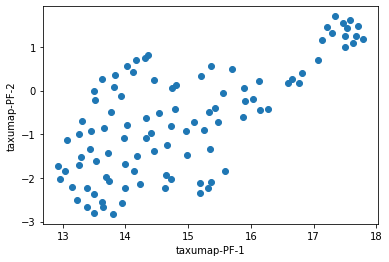

In [8]:
# Visualize your TaxUMAP
fig, ax  = tu.scatter(save=True, outdir='example_results')

# TaxUMAP will save this plot as `taxumap_scatterplot.pdf` in the location specified by parameter `outdir`. If no location is given, it will default to the present working directory.

### Save TaxUMAP embedding

In [9]:
tu.save_embedding('example_results/taxumap_olin_embedding.csv')

# If no path provided, TaxUMAP will save the embedded as "taxumap_embedding.csv" to the present working directory.

Taxumap(agg_levels = ['Phylum', 'Family'], weights = [1, 1])